In [32]:
# Example for how to take a csv from data and train a boosted decision tree
# also shows how to interpret cross-validation results

import boost_multi

In [3]:
# load in data and make labels and weights
# this takes the csv files specified in the script and returns numpy arrays
data,label,weight = boost_multi.load_data()

In [4]:
# can run cross-validation to see how trees behave
# only running with 50 trees now for testing --- should increase number for better performance
test_error,test_falsepos,test_falseneg,scores = boost_multi.run_cv( data,label,weight )

On fold 0
Fold error: 0.0896
On fold 1
Fold error: 0.0834
On fold 2
Fold error: 0.0842
On fold 3
Fold error: 0.081
On fold 4
Fold error: 0.0854
On fold 5
Fold error: 0.0802
On fold 6
Fold error: 0.076
On fold 7
Fold error: 0.0806
On fold 8
Fold error: 0.0834
On fold 9
Fold error: 0.0876


In [5]:
# can look at error and variance from cross-validation
print np.array(test_error).mean()
print np.array(test_error).std()

0.08314
0.00372349298375


In [6]:
'''
the output array "scores" is a 6-dimensional array
the first column is the probability of each sample to be a proton
the second-fifth columns are the probabilities for each sample to be a muon, pi, em, or cosmic track
the last column is the monte carlo truth label of the sample
(0 = proton, 1 = muon, 2 = pion, 3 = electron or photon, 4 = cosmic)
'''
# these lines pull out 5-D arrays of scores for each mc particle in the training set
proton_scores = scores[0:5,scores[5,:] == 0]
muon_scores   = scores[0:5,scores[5,:] == 1]
pion_scores   = scores[0:5,scores[5,:] == 2]
em_scores     = scores[0:5,scores[5,:] == 3]
cosmic_scores = scores[0:5,scores[5,:] == 4]

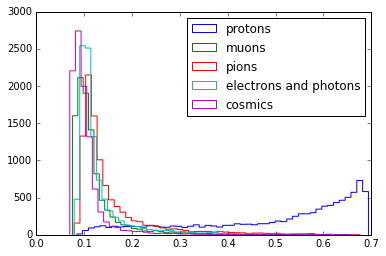

In [7]:
# We can now plot the distribution of proton scores (first column in scores) for each particle type
# We could do the same for the probability of being a muon or pion, etc.
plt.hist(proton_scores[0],bins=50,histtype='step',label='protons');
plt.hist(muon_scores[0]  ,bins=50,histtype='step',label='muons');
plt.hist(pion_scores[0]  ,bins=50,histtype='step',label='pions');
plt.hist(em_scores[0]    ,bins=50,histtype='step',label='electrons and photons');
plt.hist(cosmic_scores[0],bins=50,histtype='step',label='cosmics');
plt.legend();

In [8]:
# once we are satisfied with how the trees behave, we can train on all of the data and save the model
# we have already loaded the data in the first step, so we don't need to do it again
bdt = boost_multi.make_bdt( data,label,weight )

In [9]:
# we should save this to use later to predict data
bdt.save_model('bdts/multi.bst')

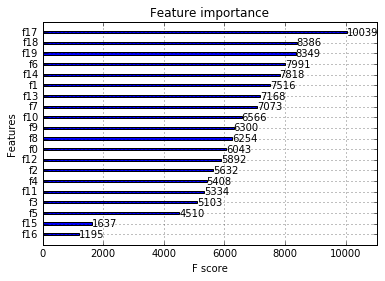

In [15]:
# we can also look at what the important features are
# these are the most common variables that the trees used to split the data
# first print the feature names for reference (copied from python script):
features = ['nhits','length','starty','startz','endy','endz','theta','phi',
            'distlenratio','startdqdx','enddqdx','dqdxdiff','dqdxratio',
            'totaldqdx','averagedqdx','cosmicscore','coscontscore',
            'pidpida','pidchi','cfdistance']
import xgboost as xgb
ax = xgb.plot_importance(bdt);

In [29]:
'''
I haven't spent the time to figure out an elegant way to match the 
features to the labels on the importance plot yet
for now we can look one-by-one
'''
# the three most important features are 17, 18, and 19:
print feature_names[17]
print feature_names[18]
print feature_names[19]

pidpida
pidchi
cfdistance


In [30]:
# the three least important are 5, 15, and 16
print feature_names[5]
print feature_names[15]
print feature_names[16]

endz
cosmicscore
coscontscore


In [31]:
# to use the BDT model to predict can use predict_multi.py script